<a href="https://colab.research.google.com/github/sachinmotwani20/SP_Python/blob/master/Ch1%2CIntroToDSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#ThinkDSP by Allen Downey: Introduction to DSP (PyCon 2017)
*   ***Signal*** represents a continuous mathematical function that has values over the entire range of time.
*   ***Wave*** contains an array of discrete samples. Eg., Any audio recording, mp3 file, wave file etc. any kind of digial recording of Sound.
*   ***Spectrum*** contains the discrete Fourier Transform of a Wave.
*   ***Spectral Analysis*** refers to considering a signal & figuring out what frequency components it contains; how loud those frequency components are. The spectrum of a signa encodes the amplitude of each component.
*   ***Discrete Fourier Transform*** (DFT) of a wave is its spectrum. Fast Fourier Transform (FFT) is an efficient algorithm to find DFT.
*   We use 'Wave' class here, which conatins a function 'Wave.make_spectrum'. This is a wrapper for 'numpy.fft.rfft' where 'rfft' stands for "real fft". The values in the Wave are real (not complex).  

The Wave Class (from the documentation)

```
class Wave:
  def make_spectrum(self):
    hs = np.fft.rfft(self.ys)
    n = len(self.ys)  #number of samples 
    d = 1/self.framerate   # time between samples 
    fs = np.fft.rfftfreq(n, d)
    return Spectrum(hs, fs, self.framerate)
```



#How does the DFT work?
Compute correlation betweeen the signal & sinusoids with different frequencies. 

htttp://paulbourke.net/miscellaneous/dft/

#Filtering
A filter modifies a signal by amplifying/attenuating some components more than others.

#Signals
Signal represents a continuous mathematical function that has values over the entire range of time.

In [17]:
!pip install thinkx
#Contains modules like thinkdsp & thinkplot

In [0]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp #provides functions & classes supporting Signal Processing
import thinkplot #wrapper around matplotlib

import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display


Initiate Signals

In [0]:
cos_sig = thinkdsp.CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = thinkdsp.SinSignal(freq=880, amp=0.5, offset=0)


Plot the sine and cosine signals. [By default, plot plots three periods.]

No handles with labels found to put in legend.


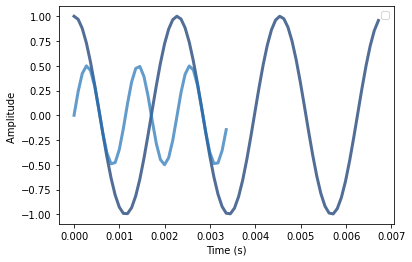

In [26]:
cos_sig.plot()
sin_sig.plot()
thinkplot.config(xlabel= 'Time (s)', ylabel='Amplitude ')
#Notice that the frequency of the sine wave is doubled, so the period is halved.

#I have commented my concern over the legends on thinkDSP stack overflow, waiting for a reply on the same

Sum of the two signals

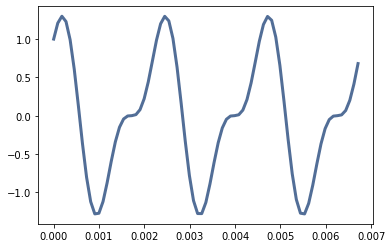

In [27]:
mix = sin_sig + cos_sig
mix.plot()

#Waves
Wave contains an array of discrete samples. Eg., Any audio recording, mp3 file, wave file etc. any kind of digial recording of Sound.

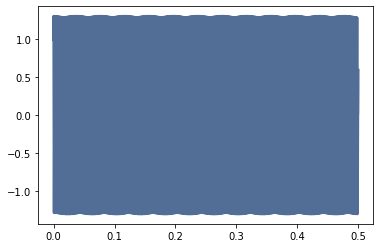

In [29]:
wave = mix.make_wave(duration=0.5, start=0, framerate = 11025)
wave.plot() #Just for amusement purpose

IPython provides an Audio widget that can play a wave

In [30]:
from IPython.display import Audio
audio = Audio(data = wave.ys , rate = wave.framerate)
audio

wave also provides a function 'make_audio( )', which does the same thing

In [31]:
wave.make_audio()

The ys attribute is a NumPy array that contains the values from the signal. The interval between samples is the inverse of the framerate.

In [32]:
print('Number of samples ', len(wave.ys))
print('Timestep in ms ', 1/ wave.framerate *1000)

Number of samples  5512
Timestep in ms  0.09070294784580499




Signal objects that represent periodic signals have a period attribute.

Wave provides segment, which creates a new wave. So we can pull out a 3 period segment of this wave.


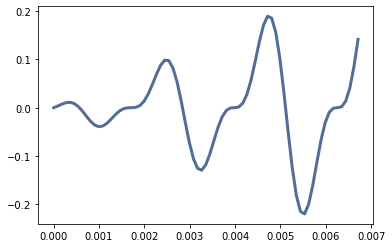

In [38]:
period = mix.period
segment = wave.segment(start=0, duration = period*3)
segment.plot()

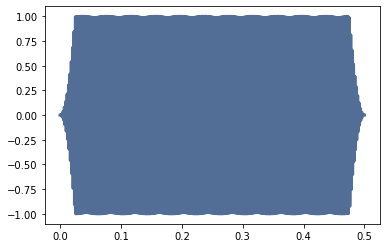

In [39]:
wave.normalize() #normalize scales a wave so the range doesn't exceed -1 to 1.
wave.apodize() #apodize tapers the beginning and end of the wave so it doesn't click when you play it.
wave.plot()



You can write a wave to a WAV file.

In [40]:
wave.write('temp.wav') #wave.write writes the wave to a file so it can be used by an exernal player.
thinkdsp.play_wave(filename='temp.wav', player='aplay')

Writing temp.wav




**read_wave** reads WAV files. The WAV examples in the book are from freesound.org.

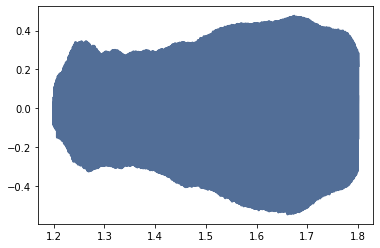

In [42]:
wave = thinkdsp.read_wave('92002__jcveliz__violin-origional.wav')
wave.make_audio() 
start = 1.2
duration = 0.6
segment = wave.segment(start, duration) #pulled out a segment of this recording where the pitch is constant. 
#When we plot the segment, we can't see the waveform clearly, but we can see the "envelope", which tracks the change in amplitude during the segment.
segment.plot()

#Spectrums
Spectrum contains the discrete Fourier Transform of a Wave.

No handles with labels found to put in legend.


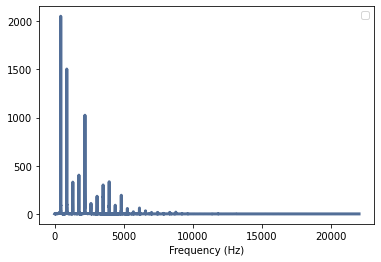

In [44]:
spectrum = segment.make_spectrum()
spectrum.plot()
thinkplot.config(xlabel='Frequency (Hz)')

The frequency components above 10 kHz are small. We can see the lower frequencies more clearly by providing an upper bound.

No handles with labels found to put in legend.


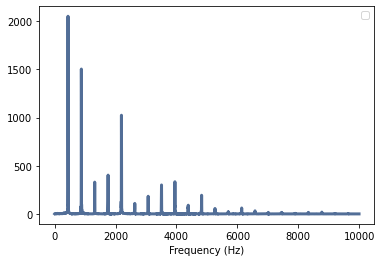

In [45]:
spectrum.plot(high=10000)
thinkplot.config(xlabel='Frequency (Hz)')

Spectrum provides low_pass, which applies a low pass filter; that is, it attenuates all frequency components above a cutoff frequency.

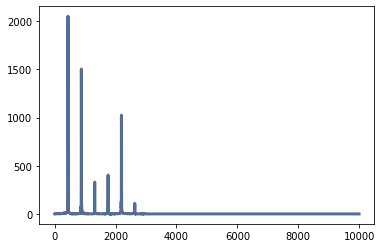

In [46]:
spectrum.low_pass(3000)
spectrum.plot(high=10000)

Convert filter spectrum back to Wave

No handles with labels found to put in legend.


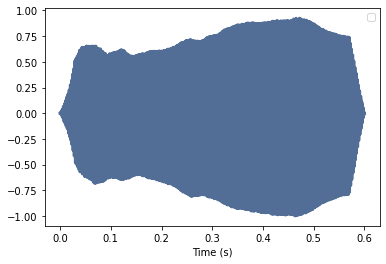

In [47]:
filtered = spectrum.make_wave()
filtered.normalize() #normalizing the wave between -1 & 1
filtered.apodize() #To avoid clicks 
filtered.plot()
thinkplot.config(xlabel='Time (s)')

Same manipulations are done to the original signal

No handles with labels found to put in legend.


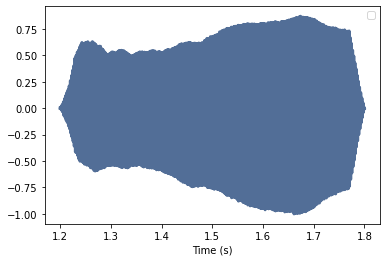

In [48]:
segment.normalize()
segment.apodize()
segment.plot()
thinkplot.config(xlabel='Time (s)')

Finally, we can listen to the original segment and the filtered version.

In [52]:
segment.make_audio()

In [51]:
filtered.make_audio()

The original sounds more complex, with some high-frequency components that sound buzzy. The filtered version sounds more like a pure tone, with a more muffled quality. The cutoff frequency We chose, 3000 Hz, is similar to the quality of a telephone line, so this example simulates the sound of a violin recording played over a telephone.

#Interaction
Interactive IPython Widgets

In [0]:
def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(color='#045a8d')
    thinkplot.show(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

Adjust the sliders to control the start and duration of the segment and the cutoff frequency applied to the spectrum.

In [55]:
wave = thinkdsp.read_wave('92002__jcveliz__violin-origional.wav')
interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 10000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

#Low Pass Filter
Attenuates high frequencies, lets low frequencie pass. Everything in the world behaves like a low pass filter with a very low cut off frequency.Hence, sounds tend to 'muffle' under water, through a pillow or wall.